<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Notebooks-settings-and-libraries" data-toc-modified-id="Notebooks-settings-and-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Notebooks settings and libraries</a></span><ul class="toc-item"><li><span><a href="#Notebook-magic" data-toc-modified-id="Notebook-magic-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Notebook magic</a></span></li><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#Plotting-style" data-toc-modified-id="Plotting-style-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Plotting style</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Functions</a></span></li></ul></li><li><span><a href="#Poisson-vs-normal" data-toc-modified-id="Poisson-vs-normal-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Poisson vs normal</a></span><ul class="toc-item"><li><span><a href="#Simulate-an-experiment" data-toc-modified-id="Simulate-an-experiment-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Simulate an experiment</a></span></li><li><span><a href="#Drawing-from-different-distributions" data-toc-modified-id="Drawing-from-different-distributions-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Drawing from different distributions</a></span></li></ul></li></ul></div>

# Notebooks settings and libraries

## Notebook magic

In [1]:
%matplotlib inline

## Import libraries

In [2]:
import pandas as pd
import itertools
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import random
import numpy as np
import matplotlib.colors
from matplotlib.colors import ListedColormap
from statsmodels.formula.api import ols
import pymc3 as pm
from scipy import optimize
import scipy.stats

## Plotting style

In [3]:
plt.style.use('seaborn-white')
sns.set_style('white')
palette = sns.color_palette()

## Functions

In [21]:
def plot_poisson(mu, **kwargs):
    x = np.arange(scipy.stats.poisson.ppf(0.001, mu = mu),
                    scipy.stats.poisson.ppf(0.999, mu = mu))
    plt.plot(x, scipy.stats.poisson.pmf(x, mu = mu),
         lw=5, alpha=0.6, **kwargs)

In [25]:
def plot_norm(mu, var, **kwargs):
    x = np.linspace(scipy.stats.norm.ppf(0.001, loc = mu, scale = var**0.5),
                    scipy.stats.norm.ppf(0.999, loc = mu, scale = var**0.5), 100)
    plt.plot(x, scipy.stats.norm.pdf(x, loc = mu, scale = var**0.5),
         lw=5, alpha=0.6, **kwargs)

In [56]:
def plot_student(N, loc, scale, **kwargs):
#Plot Student distribution
    x = np.linspace(scipy.stats.t.ppf(0.01, N-1, loc, scale),
                    scipy.stats.t.ppf(0.99, N-1, loc, scale), 1000)
    plt.plot(x, scipy.stats.t.pdf(x, N-1, loc, scale),
     lw=5, alpha=0.6, **kwargs)

Confidence interval

In [ ]:
z = lambda alpha: scipy.stats.norm.ppf(1 - alpha/2)
conf_int = lambda z, var, n: z*var**0.5/n**0.5

# Poisson vs normal

Parameters of the population distributions

In [197]:
mu = 30
n_trials = 3

Population vs sample distributions

Text(0.5,0,'Number of events')

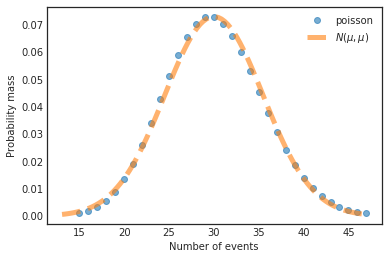

In [198]:
#Population distributions
plot_poisson(mu, label = 'poisson', color = palette[0], linestyle = '', marker = 'o')
#Sample distributions
plot_norm(mu, mu, label = r'$N(\mu, \mu)$', color = palette[1], linestyle = '--')

plt.legend(bbox_to_anchor = (1,1))
plt.ylabel('Probability mass')
plt.xlabel('Number of events')

Generate samples of the populations

In [109]:
n_iterations = 1000

In [110]:
estimates = list(map(lambda x: np.mean(np.random.poisson(mu, n_trials)), np.arange(0, n_iterations))
                )

Text(0.5,0,'$<\\lambda>$')

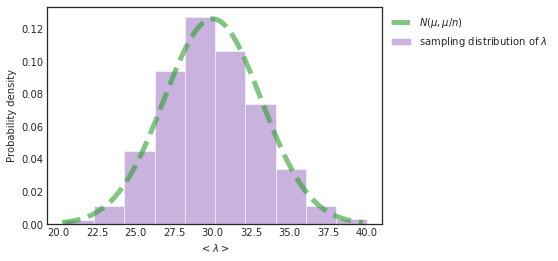

In [112]:
_ = plt.hist(estimates, alpha = 0.5, density = 'normed', color = palette[4], label = r'sampling distribution of $\lambda$')
plot_norm(mu, mu/n_trials, label = r'$N(\mu, \mu/n)$', color = palette[2], linestyle = '--')
plt.legend(bbox_to_anchor = (1,1))
plt.ylabel('Probability density')
plt.xlabel(r'$<\lambda>$')

$\sigma<k> = \sqrt{Var[k]/n}$

$Var[k] = \lambda$

$<k> = \lambda$

Theoretical estimates

In [94]:
print('Var[<k>] = {0} \nsigma[<k>] = {1}'.format(mu/n_trials, (mu/n_trials)**0.5))

Var[<k>] = 10.0 
sigma[<k>] = 3.1622776601683795


Measured parameters

In [95]:
print('Var[<k>] = {0} \nsigma[<k>] = {1}'.format(np.var(estimates), np.std(estimates)))

Var[<k>] = 9.361955555555555 
sigma[<k>] = 3.059731288129001


## Simulate an experiment

Draw one sample

In [101]:
sample = np.random.poisson(mu, n_trials)

In [106]:
print('<k> = {0} +- {1}'.format(np.mean(sample).round(2),
                               conf_int(z(0.05), np.mean(sample), n_trials).round(2))
     )

<k> = 27.67 +- 5.95


In [100]:
conf_int(z(0.05), mu, n_trials)

6.1979503230456165

## Drawing from different distributions 

In [117]:
def get_mean_var(sample):
    return([np.mean(sample), np.var(sample)])

In [124]:
estimates = np.array(list(map(lambda mu: get_mean_var(np.random.poisson(mu, n_trials)), np.arange(30, 300))
                ))

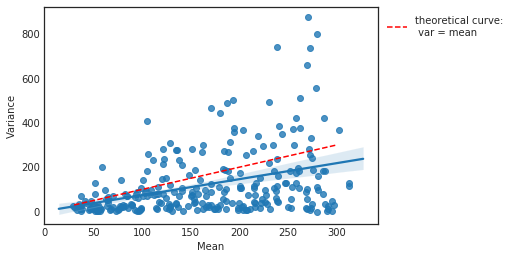

In [168]:
sns.regplot(estimates[:, 0], estimates[:, 1])
plt.xlabel('Mean')
plt.ylabel('Variance')
x = np.arange(30, 300)
plt.plot(x, x, 'r--', label = 'theoretical curve: \n var = mean')
plt.legend(bbox_to_anchor = (1,1))